# ANÁLISIS UNIVARIANTE

* Análisis exploratorio EDA: Analizar el comportamiento individualizado de cada variable del Dataframe
* Histograma por cada variable numérica
* Gráfico de tarta para variables categóricas
* Gráfico de líneas para variables temporales

## 1. Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suprimir los warnings
warnings.filterwarnings('ignore')

from math import pi
from ydata_profiling import ProfileReport

## 2. Cargar dataset


In [2]:
ruta = '../data/calidad_clean_outliers.csv'
df = pd.read_csv(ruta, sep=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


## 3. Preparar datos

* Crear nuevas columnas categóricas
* Transformar columnas
* Seleccionar las columnas sobre las que realizar EDA


In [3]:
# Explorar columnas del dataset, para crear,transformar y eliminar las que sean necesarias para el análisis
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA'],
      dtype='object')

#### 3.1  Crear columna 'ESCALA_ICA'

Escala de calidad del aire: 

* Muy bueno:   0 -  19
* Bueno:      20 -  49
* Regular:    50 -  99
* Malo:      100 - 149
* Muy malo:  150 - 249
* Peligroso: 250+

Escala de Calidad del Aire por Contaminante:

                Muy Buena   Buena     Regular    Mala     Muy Mala
    * PM2.5:    0-15 	16-30     31-55     56-110   >110
    * PM10:     0-25 	26-50 	  51-90     91-180   >180
    * NO2:      0-50 	51-100   101-200    201-400  >400
    * O3: 	    0-60        61-120   121-180    181-240  >240
    * SO2: 	    0-50        51-100   101-350    351-500  >500

In [4]:
# Crear la columna "escala_ica" basada en los valores de la columna "ICA"
df['ESCALA_ICA'] = pd.cut(df['ICA'], bins=[-float('inf'), 19, 49, 99, 149, 249, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala', 'Peligrosa'])
df['ESCALA_PM2.5'] = pd.cut(df['PM2.5'], bins=[-float('inf'), 15, 30, 55, 110, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_PM10'] = pd.cut(df['PM10'], bins=[-float('inf'), 25, 50, 90, 180, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_NO2'] = pd.cut(df['NO2'], bins=[-float('inf'), 50, 100, 200, 400, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_O3'] = pd.cut(df['O3'], bins=[-float('inf'), 60, 120, 180, 240, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_SO2'] = pd.cut(df['SO2'], bins=[-float('inf'), 50, 100, 350, 500, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])

# Imprimir el resultado
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,ICA_PM10,ICA_O3,ICA_NO2,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,38.0,9.90,125.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,32.0,6.64,137.5,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena


#### 3.2 Crear columna 'TRAMO_HORA'

Esta columna dividirá la columna 'HORA' en dos tramos:

* Punta:  8 a 20
* Valle:  21 a 7

In [5]:
# Convertir la columna "FECHA" en un objeto de fecha y hora
df['HORA'] = pd.to_datetime(df['FECHA']).dt.hour

# Definir la función para clasificar el tramo de hora
def clasificar_tramo_hora(hora):
    if 8 <= hora <= 20:
        return 'Hora Punta'
    else:
        return 'Hora Valle'

# Crear la columna "TRAMO_HORA"
df['TRAMO_HORA'] = df['HORA'].apply(clasificar_tramo_hora)

# Mostrar el DataFrame resultante
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,ICA_O3,ICA_NO2,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2,TRAMO_HORA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,9.90,125.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Hora Valle
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,6.64,137.5,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena,Hora Valle


#### 3.3 Crear columnas 'RIESGO'

La Organización Mundial de la Salud (OMS) elabora directrices sobre calidad del aire basadas en estudios epidemiológicos y ofrece recomendaciones para proteger la salud pública de los efectos adversos los contaminantes atmosféricos.

Las guías de la OMS establecen para cada contaminante unos valores guía por debajo de los cuales se asume que, o bien no se producen efectos sobre la salud, o bien estos son mínimos.

* NO2: 25 μg/m3
* SO2: 40 μg/m3
* PM10: 45 μg/m
* PM2.5: 15 μg/m3
* CO: 4 μg/m3
* O3: 100 μg/m3


In [6]:
# Verificar si hay niveles altos de NO2
df['ALERTA'] = 'Sin Riesgo'
df.loc[df['NO2'] > 25, 'ALERTA'] = 'NO2'

# Verificar si hay niveles altos de SO2
df.loc[df['SO2'] > 40, 'ALERTA'] = 'SO2'

# Verificar si hay niveles altos de PM10
df.loc[df['PM10'] > 45, 'ALERTA'] = 'PM10'

# Verificar si hay niveles altos de PM2.5
df.loc[df['PM2.5'] > 15, 'ALERTA'] = 'PM2.5'

# Verificar si hay niveles altos de CO
df.loc[df['CO'] > 4, 'ALERTA'] = 'CO'

# Verificar si hay niveles altos de O3
df.loc[df['O3'] > 100, 'ALERTA'] = 'O3'

# # Guardar el DataFrame modificado en un nuevo archivo CSV
# df.to_csv('tu_archivo_modificado.csv', index=False)
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,ICA_NO2,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2,TRAMO_HORA,ALERTA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,125.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Hora Valle,NO2
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,137.5,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena,Hora Valle,NO2


In [7]:
df['ALERTA'].value_counts()

NO2           15204
Sin Riesgo    11772
PM2.5          2543
O3             1326
PM10             15
Name: ALERTA, dtype: int64

#### 3.4 Transformar columnas a formato datetime

* FECHA
* ANO
* MES
* DIA

In [8]:
# Convertir la columna "FECHA" en un objeto de fecha y hora
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['ANO'] = pd.to_datetime(df['FECHA']).dt.year
df['MES'] = pd.to_datetime(df['FECHA']).dt.month
df['DIA'] = pd.to_datetime(df['FECHA']).dt.day
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,ICA_NO2,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2,TRAMO_HORA,ALERTA
0,2019-01-01 05:00:00,2019,1,1,5,Martes,8.0,10.0,0.4,50.0,...,125.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Hora Valle,NO2
1,2019-01-01 06:00:00,2019,1,1,6,Martes,8.0,8.0,0.4,55.0,...,137.5,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena,Hora Valle,NO2


In [9]:
# Comprobar si se ha realizado las transformaciones
df.dtypes

FECHA           datetime64[ns]
ANO                      int64
MES                      int64
DIA                      int64
HORA                     int64
DIA_SEMANA              object
ESTACION               float64
SO2                    float64
CO                     float64
NO2                    float64
PM2.5                  float64
PM10                   float64
O3                     float64
BTX                    float64
TEMPERATURA            float64
HUMEDAD                float64
ICA_SO2                float64
ICA_PM10               float64
ICA_O3                 float64
ICA_NO2                float64
ICA                    float64
ESCALA_ICA            category
ESCALA_PM2.5          category
ESCALA_PM10           category
ESCALA_NO2            category
ESCALA_O3             category
ESCALA_SO2            category
TRAMO_HORA              object
ALERTA                  object
dtype: object

#### 3.5 Eliminar columnas

In [10]:
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA', 'ESCALA_ICA',
       'ESCALA_PM2.5', 'ESCALA_PM10', 'ESCALA_NO2', 'ESCALA_O3', 'ESCALA_SO2',
       'TRAMO_HORA', 'ALERTA'],
      dtype='object')

In [11]:
# Se eliminan las columnas númericas que no interesan para las estadisticas 
df_hist = df.drop(['FECHA','ANO','MES','DIA','HORA','ESTACION','ICA_SO2','ICA_PM10','ICA_O3','ICA_NO2'],axis=1)
df_hist.head(2)

,DIA_SEMANA,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2,TRAMO_HORA,ALERTA
0,Martes,10.0,0.4,50.0,14.0,19.0,11.88,2.6,4.7,50.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Hora Valle,NO2
1,Martes,8.0,0.4,55.0,12.0,16.0,7.97,2.2,3.2,55.0,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena,Hora Valle,NO2


## 4. EDA (Análisis Exploratorio Univariante)

####  4.1.1 Estadísticas Descriptivas

In [12]:
df_hist.describe().round(2)

,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA
count,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00
mean,4.85,0.25,31.53,7.77,15.07,53.31,2.28,16.42,54.96,39.31
std,3.03,0.09,17.31,5.25,9.00,25.18,1.55,7.96,21.73,11.94
min,0.00,0.10,3.00,0.00,1.00,0.79,0.00,-2.90,8.00,12.94
25%,2.00,0.20,18.00,4.00,8.00,35.56,1.10,10.20,38.00,30.55
50%,4.00,0.20,29.00,7.00,14.00,52.04,1.90,15.50,54.00,37.99
75%,8.00,0.30,42.00,10.00,19.00,69.48,3.10,22.20,71.00,46.26
max,17.00,0.40,97.00,26.00,46.00,127.20,7.90,40.00,100.00,96.86


#### 4.1.2. Visualización con Histogramas de las variables numéricas

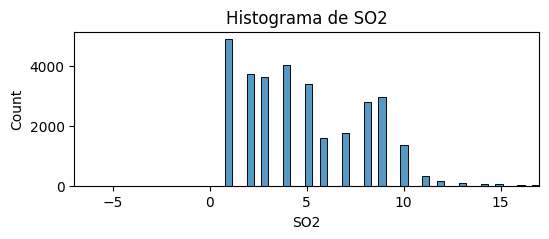

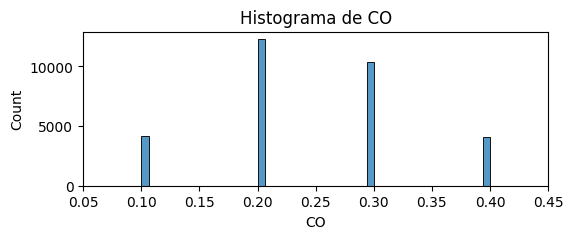

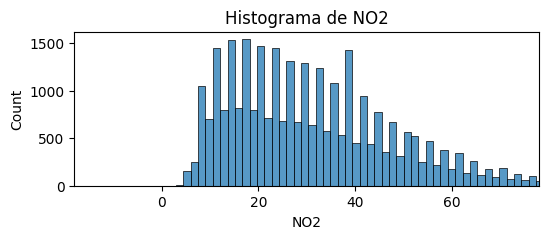

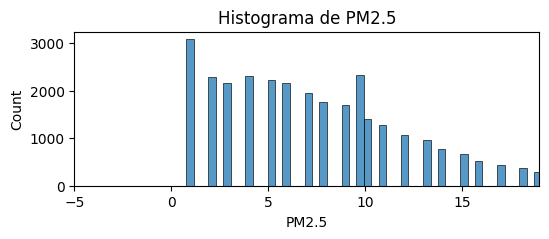

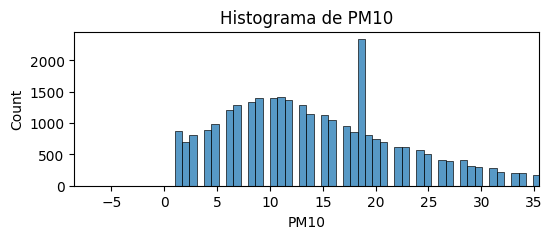

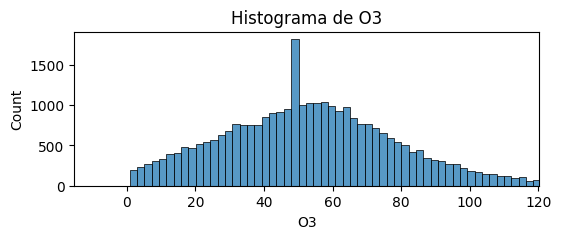

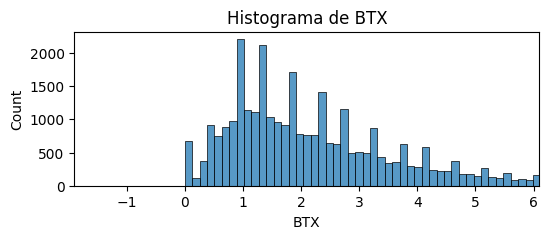

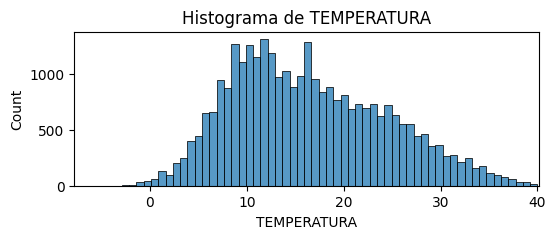

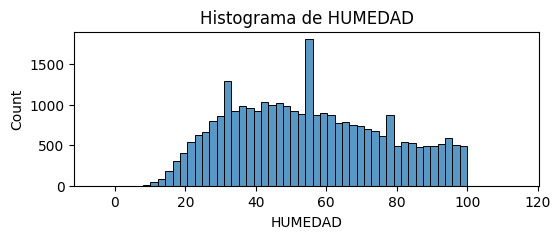

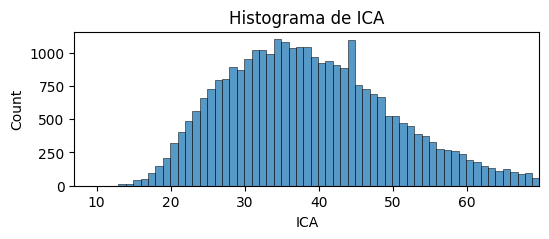

In [13]:
numeric_columns = df_hist.select_dtypes(include=np.number).columns.to_list()
for column in numeric_columns:
    plt.figure(figsize=(6,2))
    sns.histplot(data=df, x=column)
    plt.title(f'Histograma de {column}')
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    plt.xlim(lower_limit, upper_limit)
    
    plt.show()

#### 4.1.2 Histogramas para cada varible numérica en subplots

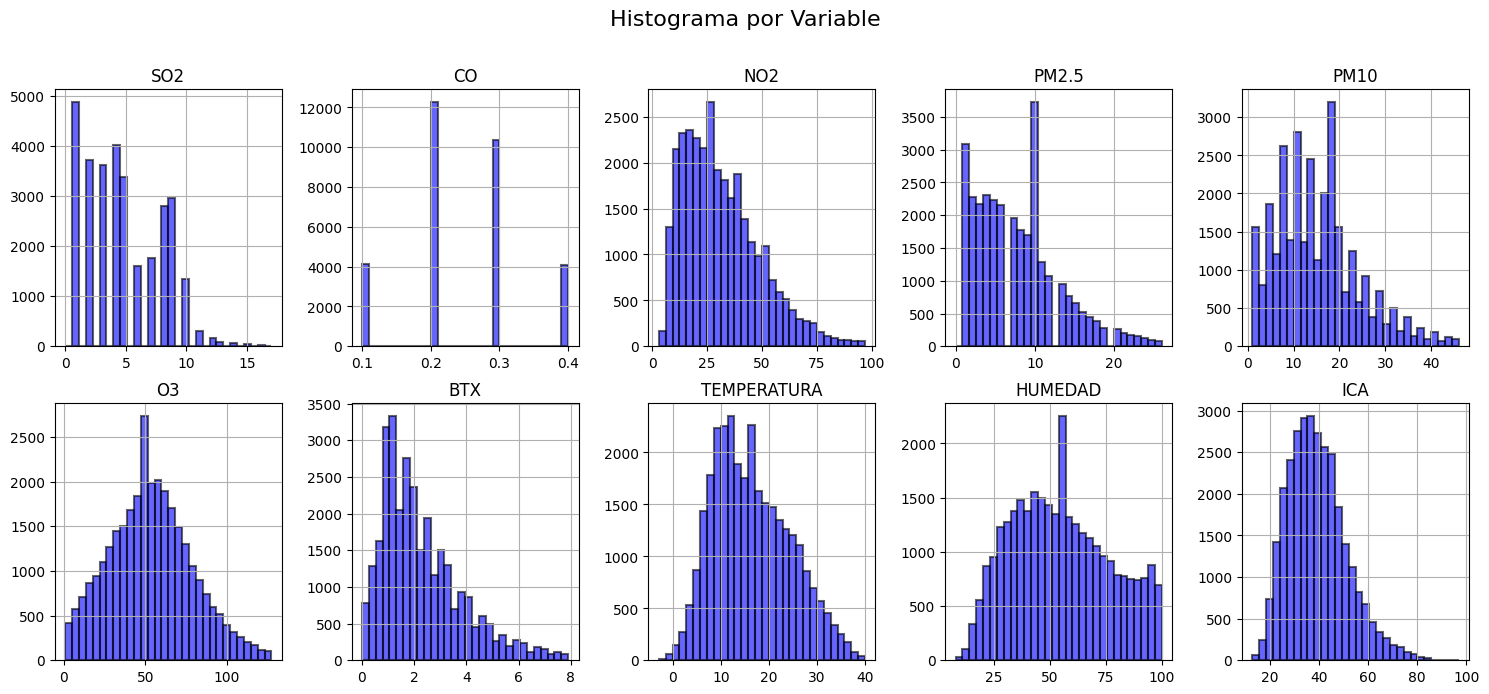

In [14]:
# Graficar los histogramas en subplots
df_hist.hist(bins=30, alpha=0.6, color='b', edgecolor='k', linewidth=1.5, figsize=(15, 10), layout=(3, 5))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar título general
plt.suptitle('Histograma por Variable', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=0.9)

# Mostrar los histogramas
plt.show()

    * OBSERVACIÓN:

    Los histogramas representan como se distribuyen los datos en cada una de las variables numéricas que se van a analizar, y nos permiten detectar valores outliers.  
 


####  4.2. Visualización columnas categóricas

In [15]:
df.dtypes

FECHA           datetime64[ns]
ANO                      int64
MES                      int64
DIA                      int64
HORA                     int64
DIA_SEMANA              object
ESTACION               float64
SO2                    float64
CO                     float64
NO2                    float64
PM2.5                  float64
PM10                   float64
O3                     float64
BTX                    float64
TEMPERATURA            float64
HUMEDAD                float64
ICA_SO2                float64
ICA_PM10               float64
ICA_O3                 float64
ICA_NO2                float64
ICA                    float64
ESCALA_ICA            category
ESCALA_PM2.5          category
ESCALA_PM10           category
ESCALA_NO2            category
ESCALA_O3             category
ESCALA_SO2            category
TRAMO_HORA              object
ALERTA                  object
dtype: object

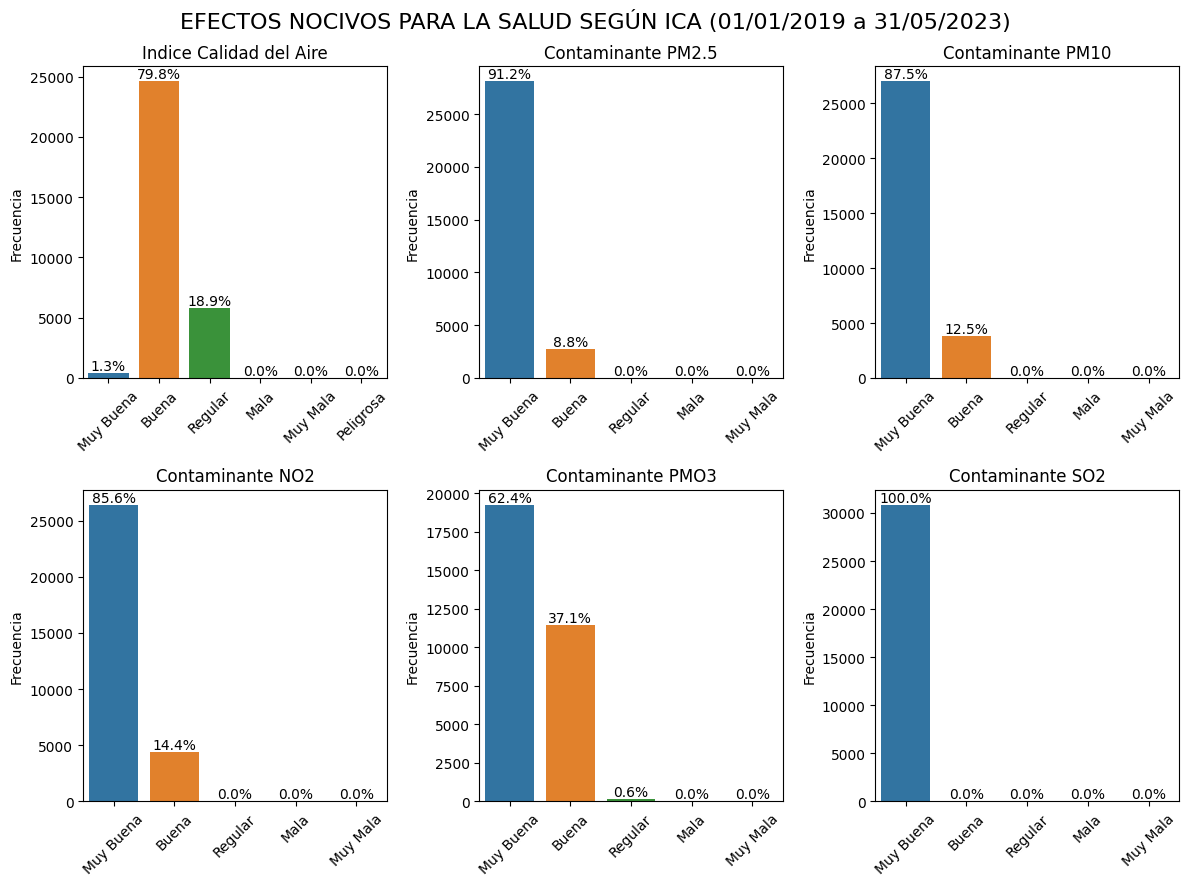

In [16]:
categorical_columns = df.select_dtypes(include='category').columns.to_list()

num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots + 1) // num_cols  # División entera redondeada hacia arriba

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 9))

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.countplot(data=df, x=column, ax=ax)
    
    # Cambiar título según la columna
    if  column == 'ESCALA_PM2.5':
        ax.set_title('Contaminante PM2.5')
    elif column == 'ESCALA_PM10':
        ax.set_title('Contaminante PM10')
    elif column == 'ESCALA_NO2':
        ax.set_title('Contaminante NO2')
    elif column == 'ESCALA_O3':
        ax.set_title('Contaminante PMO3')
    elif column == 'ESCALA_SO2':
        ax.set_title('Contaminante SO2')
    else:
        ax.set_title('Indice Calidad del Aire')
    
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

    # Rotar el eje x
    ax.tick_params(axis='x', rotation=45)

    # Mostrar el porcentaje en la parte superior de cada barra
    total = len(df)
    for p in ax.patches:
        percentage = (p.get_height() / total * 100)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='bottom')
    
# Eliminar subparcelas vacías si es necesario
if num_plots % num_cols != 0:
    fig.delaxes(axes[-1, -1])

# Agregar título general a la figura
plt.suptitle('EFECTOS NOCIVOS PARA LA SALUD SEGÚN ICA (01/01/2019 a 31/05/2023)', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=1)

plt.tight_layout()
plt.show()


    COMENTARIOS:

    En estos gráficos se puede observar en que porcentaje el ICA, y las concentracciones de los diferentes contaminantes hans sido nocivos para la salud en el período de 01/01/2019 a 31/05/2023.

    Como se puede observar ICA ha sido nocivo para la salud un 18.9%, es decir, ha superado niveles entre un 50 - 99 un 18.9% de ocasiones.

    * La concentración de PM2.5 se ha encontrado en niveles (0-15) un 91.2% de ocasiones y en niveles de (16-30) un 8.8%, por tanto, l superar el límite de 45 μg/m3 se puede concluir que un 8.8% de las ocasiones ha podido ser nocivo para la salud. Las partículas finas son partículas contaminantes inhalables con un diámetro inferior a 2,5 micrómetros que pueden entrar en los pulmones y en el torrente sanguíneo y provocar graves problemas de salud. Afectan de forma más grave a los pulmones y al corazón. La exposición a estas partículas puede provocar tos o dificultad para respirar, agravar el asma y desarrollar enfermedades respiratorias crónicas. 

    * La concentración de PM10 se ha encontrado en niveles (0-25) un 87.5% de ocasiones y en niveles de (66-50) un 12.5%, por tanto, al superar el límite de 45 μg/m3 se puede concluir que un 12.5% de las ocasiones ha podido ser nocivo para la salud. La exposición puede provocar irritación de ojos y garganta, tos, dificultad para respirar y puede agravar el asma. Una exposición más frecuente y excesiva puede tener efectos más graves para la salud. 

    * La concentración de NO2 se ha encontrado en niveles (0-50) un 85.6% de ocasiones y en niveles de (51-100) un 14.4%, por tanto, al no superar el límite de 25 μg/m3 no se puede considerar que es el período en estudio haya sido nocivo para la salud. 
    
    * La concentración de O3 se ha encontrado en niveles (0-60) un 62.4% de ocasiones y en niveles de (11-120) un 37.1%, por tanto, se puede concluir que no ha sido nocivo para la salud. El ozono a nivel del suelo puede agravar las enfermedades respiratorias existentes y también provocar irritación de garganta, dolores de cabeza y dolor de pecho. 
    
    * La concentración de SO2 se ha encontrado en niveles (0-50) un 100% de ocasiones, por tanto, se puede concluir que no ha sido nocivo para la salud al no superara el límite de 40 μg/m3. 

#### 4.3. Visualización histórico de Fecha

* Mediante está visualización se puedes observara si existe estacionalidad de Indice de Calidad del aire (ICA) en el tiempo (01/2019 a 05/2023)

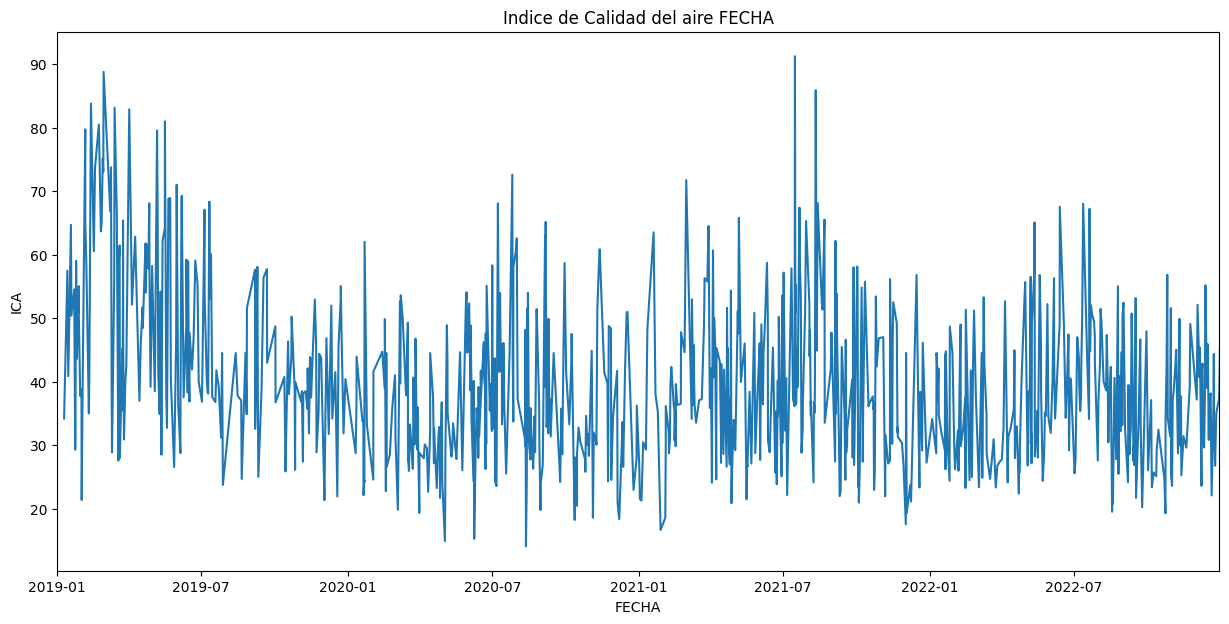

In [17]:
date_columns = df.select_dtypes(include='datetime64').columns.to_list()

for column in date_columns:
    plt.figure(figsize=(15,7))
    
    sns.lineplot(data=df.sample(1000), x=column, y='ICA')
    plt.title('Indice de Calidad del aire ' + column)
    plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2022-12-31'))
    plt.show()

    COCLUSIONES: 

    En esta gráfica se puede observar como a lo largo del año 2019 el ICA era más elevado, observando una disminución en torno a Julio de 2019, manteniéndose constante hasta Julio de 2021, mes en el que vuelve a sufrir un fuerte incremento, volviéndose a reducir en torno a Septiembre de 2021 y manteniéndose constante hasta aproximadamen Junio/Julio de 2022. 

    Observando esta gráfica podemos concluir que el ICA sufre incrementos durante los meses de verano, vólviendose a reducir en Otoño y manteniéndose constante a lo largo del año.

# ANÁLISIS BIVARIANTE

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suprimir los warnings
warnings.filterwarnings('ignore')

In [19]:
ruta = '../data/calidad_clean_outliers.csv'
df = pd.read_csv(ruta, sep=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


In [20]:
# Crear  'ESTACION_AÑO' para agrupar meses en estaciones
df['ESTACION_AÑO'] = df['MES'].apply(lambda x: 'Invierno' if x in [12, 1, 2] else 'Primavera' if x in [3, 4, 5] else 'Verano' if x in [6, 7, 8] else 'Otoño')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA,ESTACION_AÑO
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22,Invierno
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64,Invierno


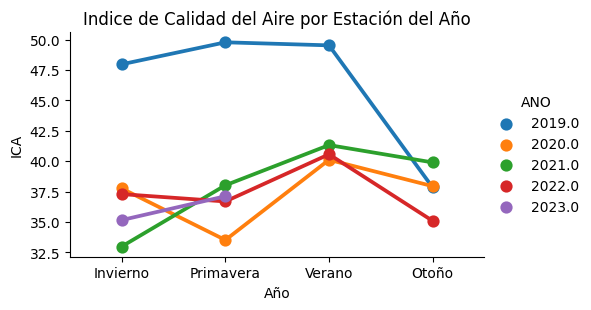

In [21]:
# Graficar el gráfico de puntos con tamaño ajustado
sns.catplot(data=df, x='ESTACION_AÑO', y='ICA', hue='ANO', kind='point', errorbar=None, height=3, aspect=1.7)
# Agregar título y etiquetas de los ejes
plt.title('Indice de Calidad del Aire por Estación del Año')
plt.xlabel('Año')
plt.ylabel('ICA')

# Mostrar el gráfico
plt.show()


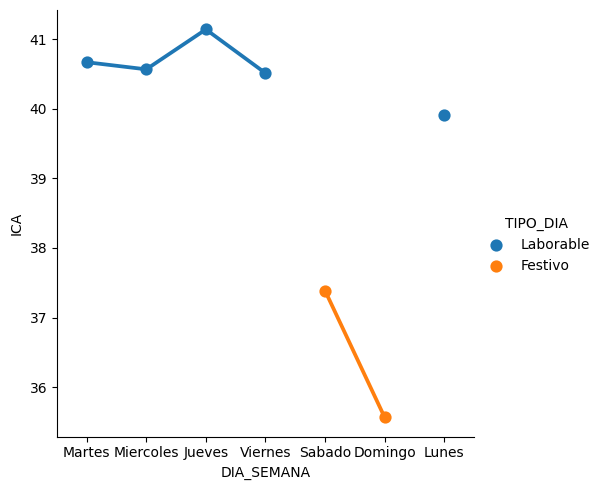

In [22]:
# Crear columna 'TIPO_DIA' para agrupar días laborables y festivos
df['TIPO_DIA'] = df['DIA_SEMANA'].apply(lambda x: 'Laborable' if x in ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes'] else 'Festivo')
#df['TIPO_DIA'] = df['DIA_SEMANA'].apply(lambda x: 'Laborable' if x in ['Martes', 'Miercoles', 'Jueves'] else 'Festivo')

# Graficar el gráfico de puntos
sns.catplot(data=df, x='DIA_SEMANA', y='ICA', hue='TIPO_DIA', kind='point', errorbar=None)

# Mostrar el gráfico
plt.show()

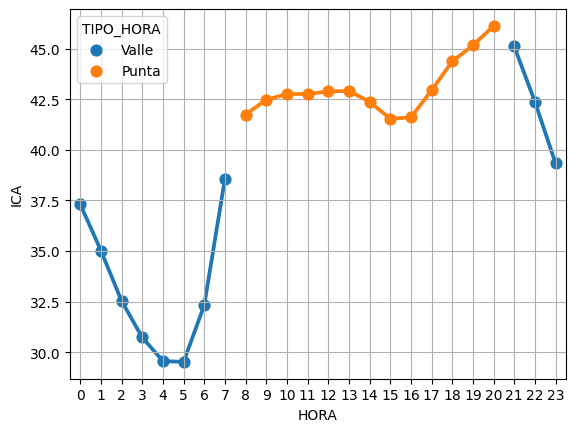

In [23]:
# Crear columna 'TIPO_HORA' para agrupar horas en valle y punta
df['TIPO_HORA'] = df['HORA'].apply(lambda x: 'Punta' if 8 <= x <= 20 else 'Valle')

# Graficar el gráfico de puntos
#sns.barplot(data=df, x='HORA', y='ICA', hue='TIPO_HORA', kind='point', errorbar=None)
# Graficar el gráfico de puntos con barras de error
sns.pointplot(data=df, x='HORA', y='ICA', hue='TIPO_HORA', ci=None)
# Agregar cuadrícula
plt.grid(True)
# Mostrar el gráfico
plt.show()


Text(0.5, 1.0, 'Evolución de la  Calidad del aire por AÑO')

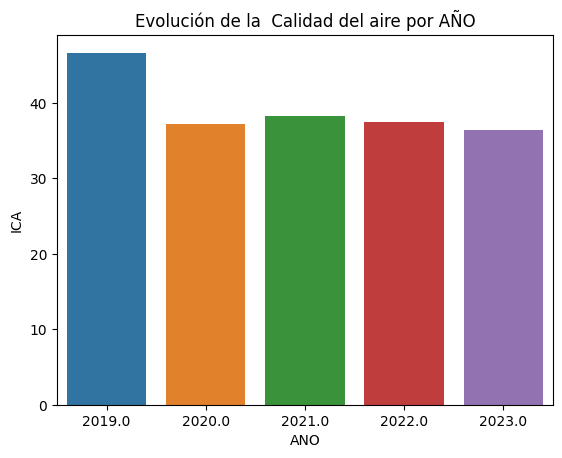

In [24]:
df_ica_ano = df.groupby('ANO')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='ANO', y='ICA')
plt.title('Evolución de la  Calidad del aire por AÑO' )

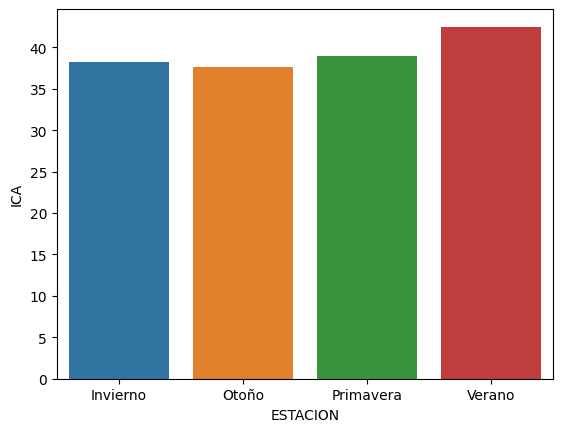

In [25]:
# Crear columna 'ESTACION' para agrupar meses en estaciones
df['ESTACION'] = df['MES'].apply(lambda x: 'Invierno' if x in [12, 1, 2] else 'Primavera' if x in [3, 4, 5] else 'Verano' if x in [6, 7, 8] else 'Otoño')

df_ica_ano = df.groupby('ESTACION')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='ESTACION', y='ICA')

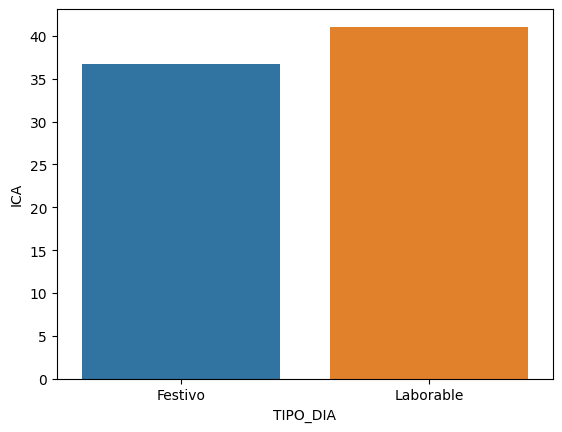

In [26]:
# Crear columna 'TIPO_DIA' para agrupar días laborables y festivos
df['TIPO_DIA'] = df['DIA_SEMANA'].apply(lambda x: 'Laborable' if x in ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes'] else 'Festivo')
df_ica_ano = df.groupby(['TIPO_DIA','HORA'])['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='TIPO_DIA', y='ICA', errorbar= None)

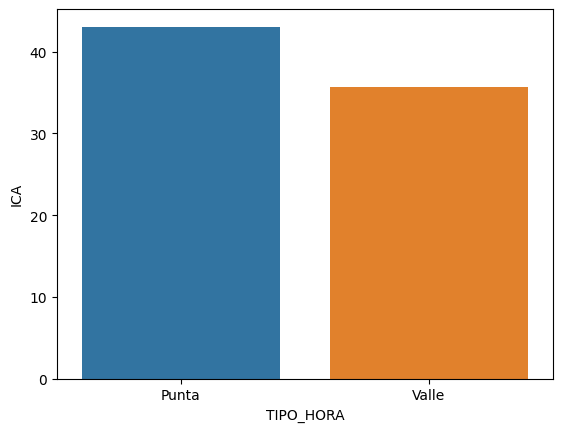

In [27]:
# Crear columna 'TIPO_HORA' para agrupar horas en valle y punta
df['TIPO_HORA'] = df['HORA'].apply(lambda x: 'Punta' if 8 <= x <= 20 else 'Valle')
df_ica_ano = df.groupby(['TIPO_HORA','HORA'])['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='TIPO_HORA', y='ICA', errorbar=None)

Para diferenciar el índice de calidad del aire (ICA) en cada año y para cada estación, puedes utilizar un gráfico de barras agrupadas (grouped bar plot). Cada barra representará un año y estará dividida en secciones para cada estación.

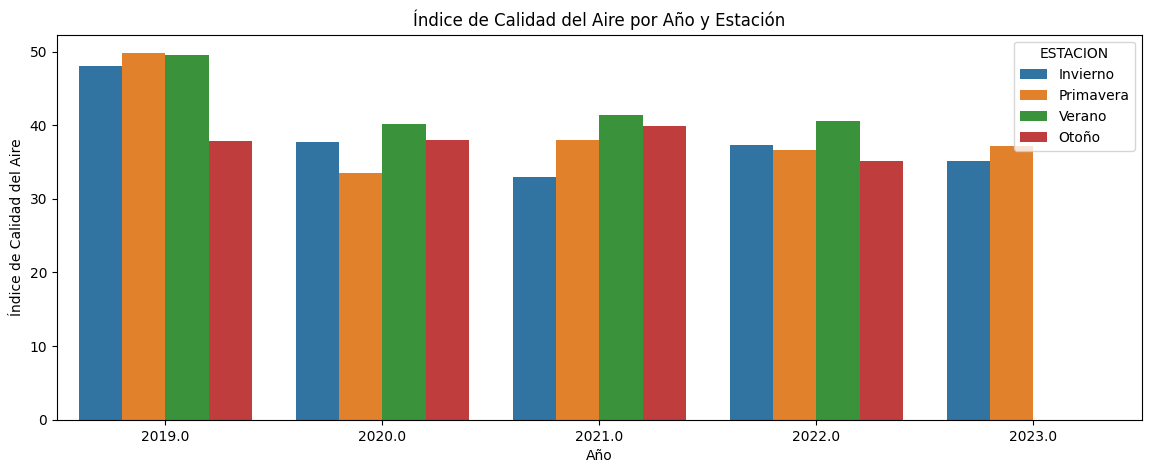

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna 'ESTACION' para agrupar meses en estaciones
df['ESTACION'] = df['MES'].apply(lambda x: 'Invierno' if x in [12, 1, 2] else 'Primavera' if x in [3, 4, 5] else 'Verano' if x in [6, 7, 8] else 'Otoño')

# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 5))

# Graficar el gráfico de barras agrupadas
sns.barplot(data=df, x='ANO', y='ICA', hue='ESTACION', errorbar=None)



# Agregar título y etiquetas de los ejes
plt.title('Índice de Calidad del Aire por Año y Estación')
plt.xlabel('Año')
plt.ylabel('Índice de Calidad del Aire')

# Mostrar el gráfico
plt.show()


Para diferenciar el índice de calidad del aire (ICA) en cada año y para cada hora, puedes utilizar un gráfico de barras agrupadas (grouped bar plot) o un mapa de calor (heatmap). A continuación, te mostraré cómo crear ambos tipos de gráficos.

En este código, utilizamos sns.barplot() para crear un gráfico de barras agrupadas. La columna 'HORA' se representa en el eje x, el ICA se representa en el eje y y el parámetro hue='AÑO' se utiliza para agrupar las barras por año. Luego, agregamos un título y etiquetas de los ejes utilizando plt.title(), plt.xlabel() y plt.ylabel(). Por último, mostramos el gráfico utilizando plt.show().

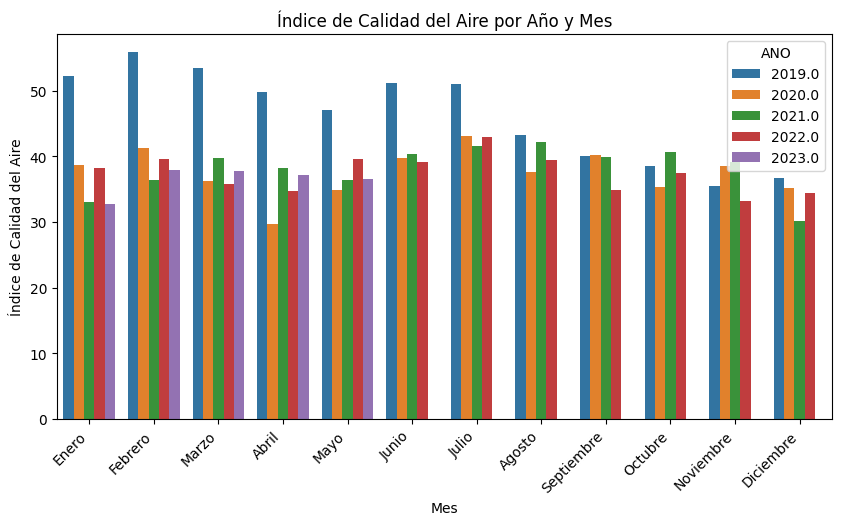

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import locale

# Establecer la configuración regional en español
locale.setlocale(locale.LC_ALL, 'es_ES')

# Obtener los nombres de los meses en español
nombres_meses = [calendar.month_name[i].capitalize() for i in range(1, 13)]

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Graficar el gráfico de barras agrupadas
sns.barplot(data=df, x='MES', y='ICA', hue='ANO', errorbar=None)

# Configurar los nombres de los meses en el eje x
plt.xticks(ticks=range(12), labels=nombres_meses, rotation=45, ha='right')

# Agregar título y etiquetas de los ejes
plt.title('Índice de Calidad del Aire por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Índice de Calidad del Aire')

# Mostrar el gráfico
plt.show()


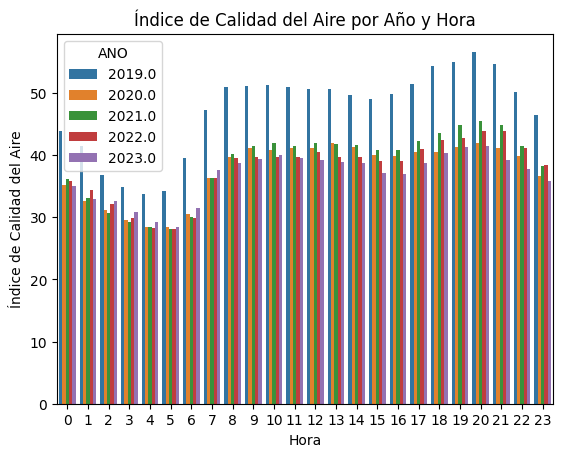

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar el gráfico de barras agrupadas
sns.barplot(data=df, x='HORA', y='ICA', hue='ANO', errorbar=None)

# Agregar título y etiquetas de los ejes
plt.title('Índice de Calidad del Aire por Año y Hora')
plt.xlabel('Hora')
plt.ylabel('Índice de Calidad del Aire')

# Mostrar el gráfico
plt.show()




En este código, utilizamos df.pivot_table() para transformar los datos en una matriz de pivote, donde las filas representan las horas, las columnas representan los años y los valores son los índices de calidad del aire (ICA). Luego, utilizamos sns.heatmap() para crear un mapa de calor a partir de la matriz de pivote. Agregamos un título y etiquetas de los ejes y mostramos el gráfico utilizando plt.show(). El mapa de calor proporciona una representación visual rápida de cómo varía el ICA en cada hora y año.

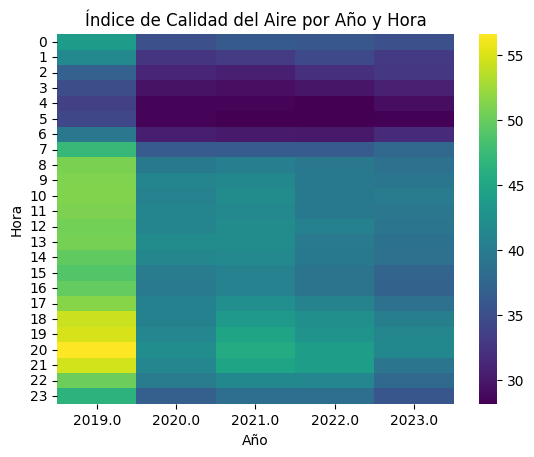

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transformar los datos en una matriz de pivote
pivot_df = df.pivot_table(index='HORA', columns='ANO', values='ICA')

# Graficar el mapa de calor
sns.heatmap(data=pivot_df, cmap='viridis')

# Agregar título y etiquetas de los ejes
plt.title('Índice de Calidad del Aire por Año y Hora')
plt.xlabel('Año')
plt.ylabel('Hora')

# Mostrar el gráfico
plt.show()


## ANÁLISIS MULTIVARIANTE

Para diferenciar el índice de calidad del aire (ICA) en cada año, para cada hora y en las diferentes estaciones del año, puedes utilizar un mapa de calor (heatmap) con subplots para cada estación. Cada subplot representará una estación del año.

En este código, primero creamos una nueva columna llamada 'ESTACION' para agrupar los meses en estaciones del año. Luego, utilizamos plt.subplots() para crear una cuadrícula de subplots, donde cada subplot representa una estación del año. Dentro del bucle for, filtramos los datos para cada estación, creamos una matriz de pivote y graficamos un mapa de calor en cada subplot. Configuramos los títulos, etiquetas de ejes y compartimos los ejes x e y entre los subplots utilizando sharex=True y sharey=True. Finalmente, ajustamos el espaciado entre los subplots con plt.tight_layout() y mostramos el gráfico utilizando plt.show().

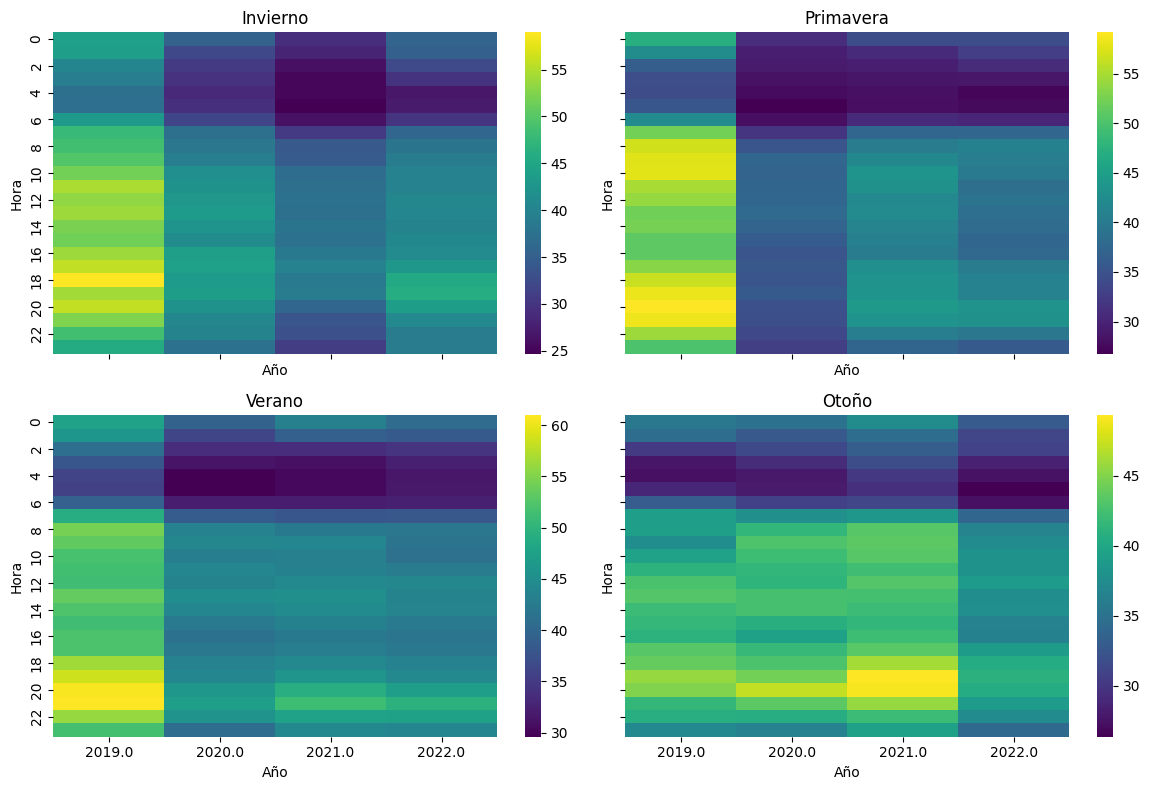

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna 'ESTACION' para agrupar meses en estaciones
df['ESTACION'] = df['MES'].apply(lambda x: 'Invierno' if x in [12, 1, 2] else 'Primavera' if x in [3, 4, 5] else 'Verano' if x in [6, 7, 8] else 'Otoño')

# Crear subplots para cada estación
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# Iterar sobre las estaciones y graficar el mapa de calor en cada subplot
for (estacion, ax) in zip(['Invierno', 'Primavera', 'Verano', 'Otoño'], axes.flatten()):
    pivot_df = df[df['ESTACION'] == estacion].pivot_table(index='HORA', columns='ANO', values='ICA')
    sns.heatmap(data=pivot_df, cmap='viridis', ax=ax)
    ax.set_title(estacion)
    ax.set_xlabel('Año')
    ax.set_ylabel('Hora')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


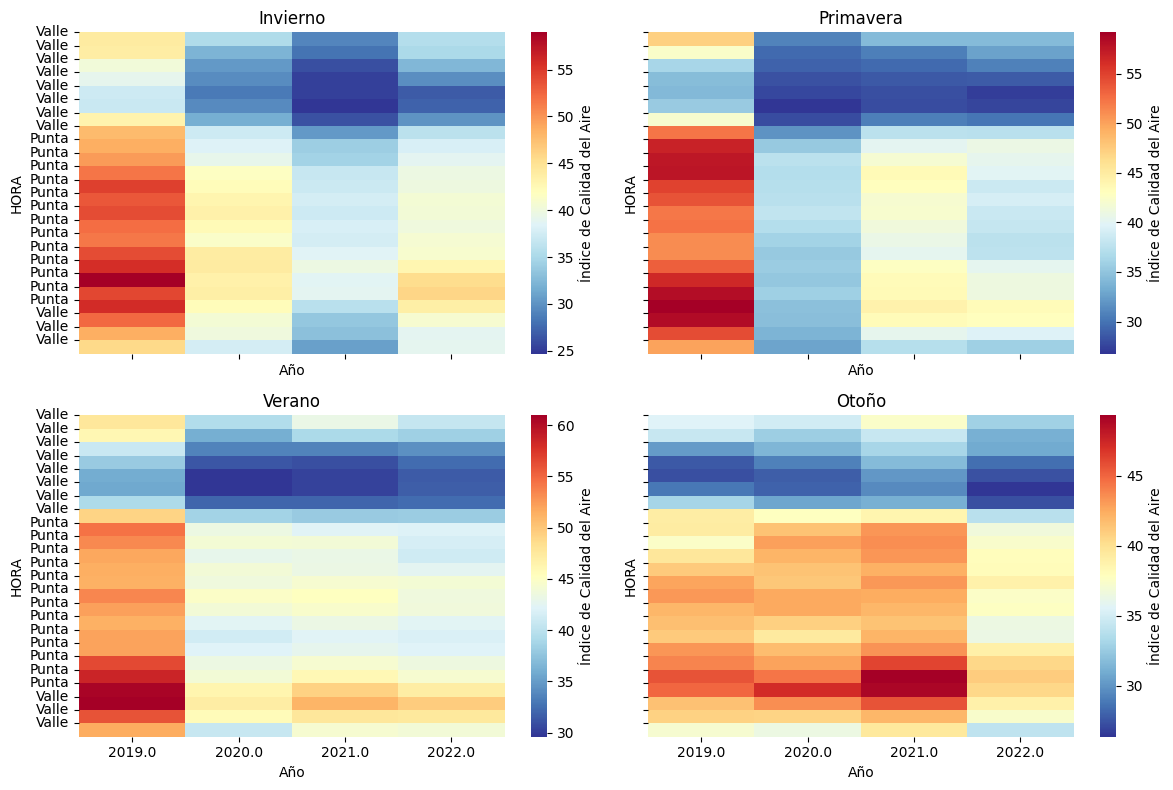

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna 'ESTACION' para agrupar meses en estaciones
df['ESTACION'] = df['MES'].apply(lambda x: 'Invierno' if x in [12, 1, 2] else 'Primavera' if x in [3, 4, 5] else 'Verano' if x in [6, 7, 8] else 'Otoño')

# Crear una nueva columna 'TIPO_HORA' para agrupar horas en punta y valle
df['TIPO_HORA'] = df['HORA'].apply(lambda x: 'Punta' if 8 <= x <= 20 else 'Valle')

# Crear subplots para cada estación
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# Iterar sobre las estaciones y graficar el mapa de calor en cada subplot
for (estacion, ax) in zip(['Invierno', 'Primavera', 'Verano', 'Otoño'], axes.flatten()):
    pivot_df = df[df['ESTACION'] == estacion].pivot_table(index='HORA', columns='ANO', values='ICA', aggfunc='mean')
    sns.heatmap(data=pivot_df, cmap='RdYlBu_r', ax=ax, cbar_kws={'label': 'Índice de Calidad del Aire'})
    ax.set_title(estacion)
    ax.set_xlabel('Año')

    # Crear etiquetas personalizadas para el eje y
    y_labels = ['Valle' if h <= 7 or h >= 21 else 'Punta' for h in pivot_df.index]
    ax.set_yticks(range(len(pivot_df.index)))
    ax.set_yticklabels(y_labels, rotation=0)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [34]:
# agrupar precio medio por year y month en la misma agrupacion
# Saber trabajar con 2 columnas a la vez
df_year_month = df.groupby(['ANO','MES'])['ICA'].mean().round(2)
df_year_month

# unstack() extrae el índice a una columna creando una TABLA PIVOTANTE por monthç/dia
df_year_month = df_year_month.unstack(level=0)
df_year_month

df_year_month = df_year_month.reset_index().rename_axis(None)
df_year_month

# unpivot: despivotar los valores de las columnas a una fila: convierte de ancho a largo
# id_vars: se duplica para cada valor úni co de año 2016, 2017, 2018
# var_name: nombre de la nueva columna al despivotar los años 2016, 2017, 2018
# value_name: nombre de la nueva columna que  tendrá los valores numéricos que estaban en 2016, 2017, 2018 
df_year_month = df_year_month.melt(var_name='ANO', id_vars='MES', value_name='ICA')
df_year_month

,MES,ANO,ICA
0,1.0,2019.0,52.26
1,2.0,2019.0,55.81
2,3.0,2019.0,53.39
3,4.0,2019.0,49.79
4,5.0,2019.0,46.98
5,6.0,2019.0,51.11
6,7.0,2019.0,51.03
7,8.0,2019.0,43.16
8,9.0,2019.0,40.02
9,10.0,2019.0,38.58


Text(0.5, 1.0, 'Evolución de la  Calidad del aire AÑO/MES')

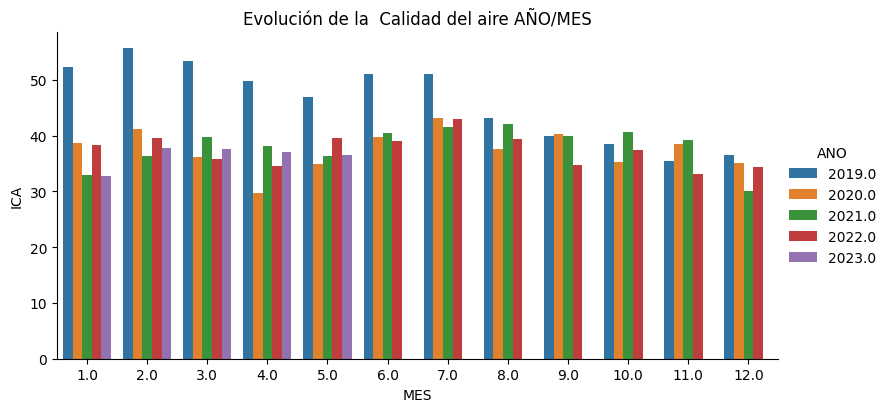

In [35]:
sns.catplot(data=df_year_month, x='MES', y='ICA', hue='ANO', kind='bar',height=4,aspect=2)
plt.title('Evolución de la  Calidad del aire AÑO/MES' )

In [36]:
df_pivot = df.pivot_table(index="MES", columns="ANO", values="ICA").round(2)
df_pivot.head(12)

ANO,2019.0,2020.0,2021.0,2022.0,2023.0
MES,,,,,
1.0,52.26,38.62,32.96,38.26,32.72
2.0,55.81,41.18,36.33,39.51,37.84
3.0,53.39,36.26,39.80,35.74,37.68
4.0,49.79,29.71,38.21,34.63,37.16
5.0,46.98,34.84,36.39,39.62,36.55
6.0,51.11,39.79,40.40,39.12,NaN
7.0,51.03,43.15,41.61,42.93,NaN
8.0,43.16,37.67,42.15,39.46,NaN
9.0,40.02,40.23,39.95,34.83,NaN


In [37]:
df_pivot.isnull().sum()

ANO
2019.0    0
2020.0    0
2021.0    0
2022.0    0
2023.0    7
dtype: int64

In [38]:
df_pivot[2023.0] = df_pivot[2023.0].fillna(0)

In [39]:
df_pivot.head(12)

ANO,2019.0,2020.0,2021.0,2022.0,2023.0
MES,,,,,
1.0,52.26,38.62,32.96,38.26,32.72
2.0,55.81,41.18,36.33,39.51,37.84
3.0,53.39,36.26,39.80,35.74,37.68
4.0,49.79,29.71,38.21,34.63,37.16
5.0,46.98,34.84,36.39,39.62,36.55
6.0,51.11,39.79,40.40,39.12,0.00
7.0,51.03,43.15,41.61,42.93,0.00
8.0,43.16,37.67,42.15,39.46,0.00
9.0,40.02,40.23,39.95,34.83,0.00


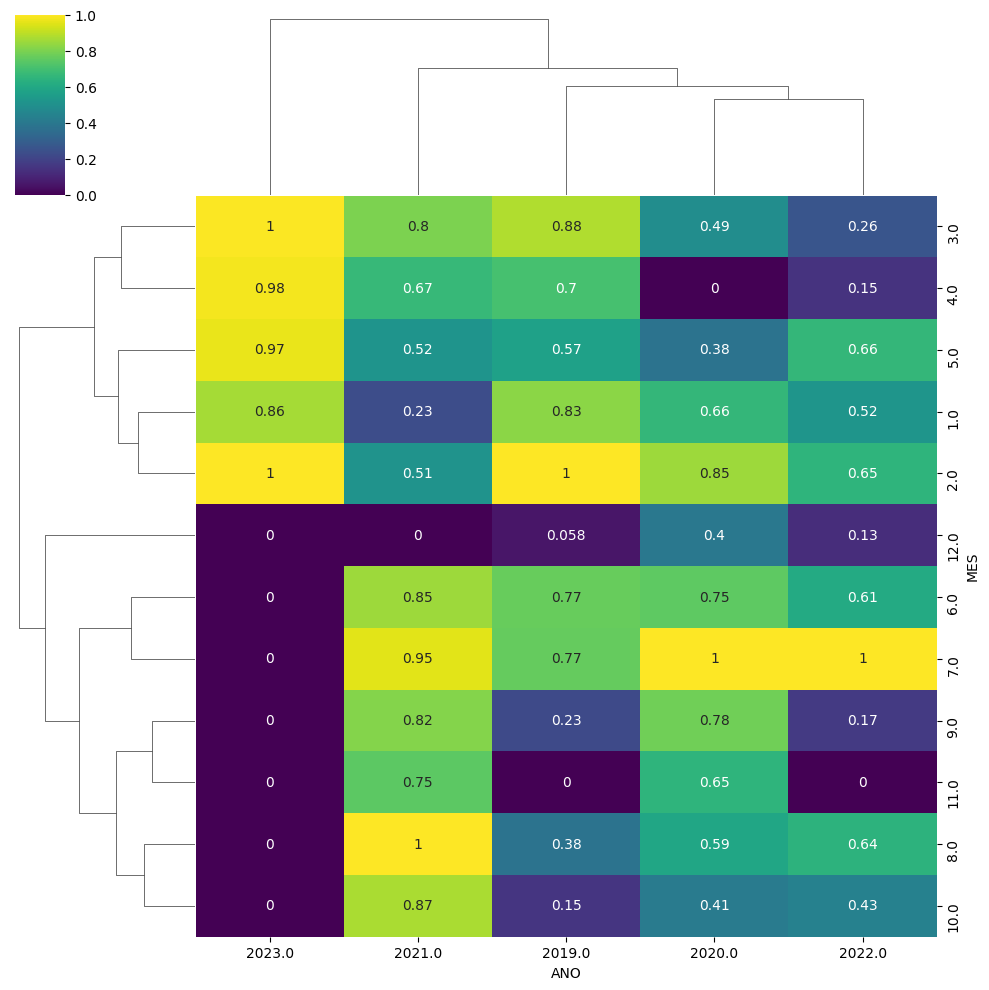

In [40]:
sns.clustermap(df_pivot, cmap="viridis", standard_scale=1, annot=True)

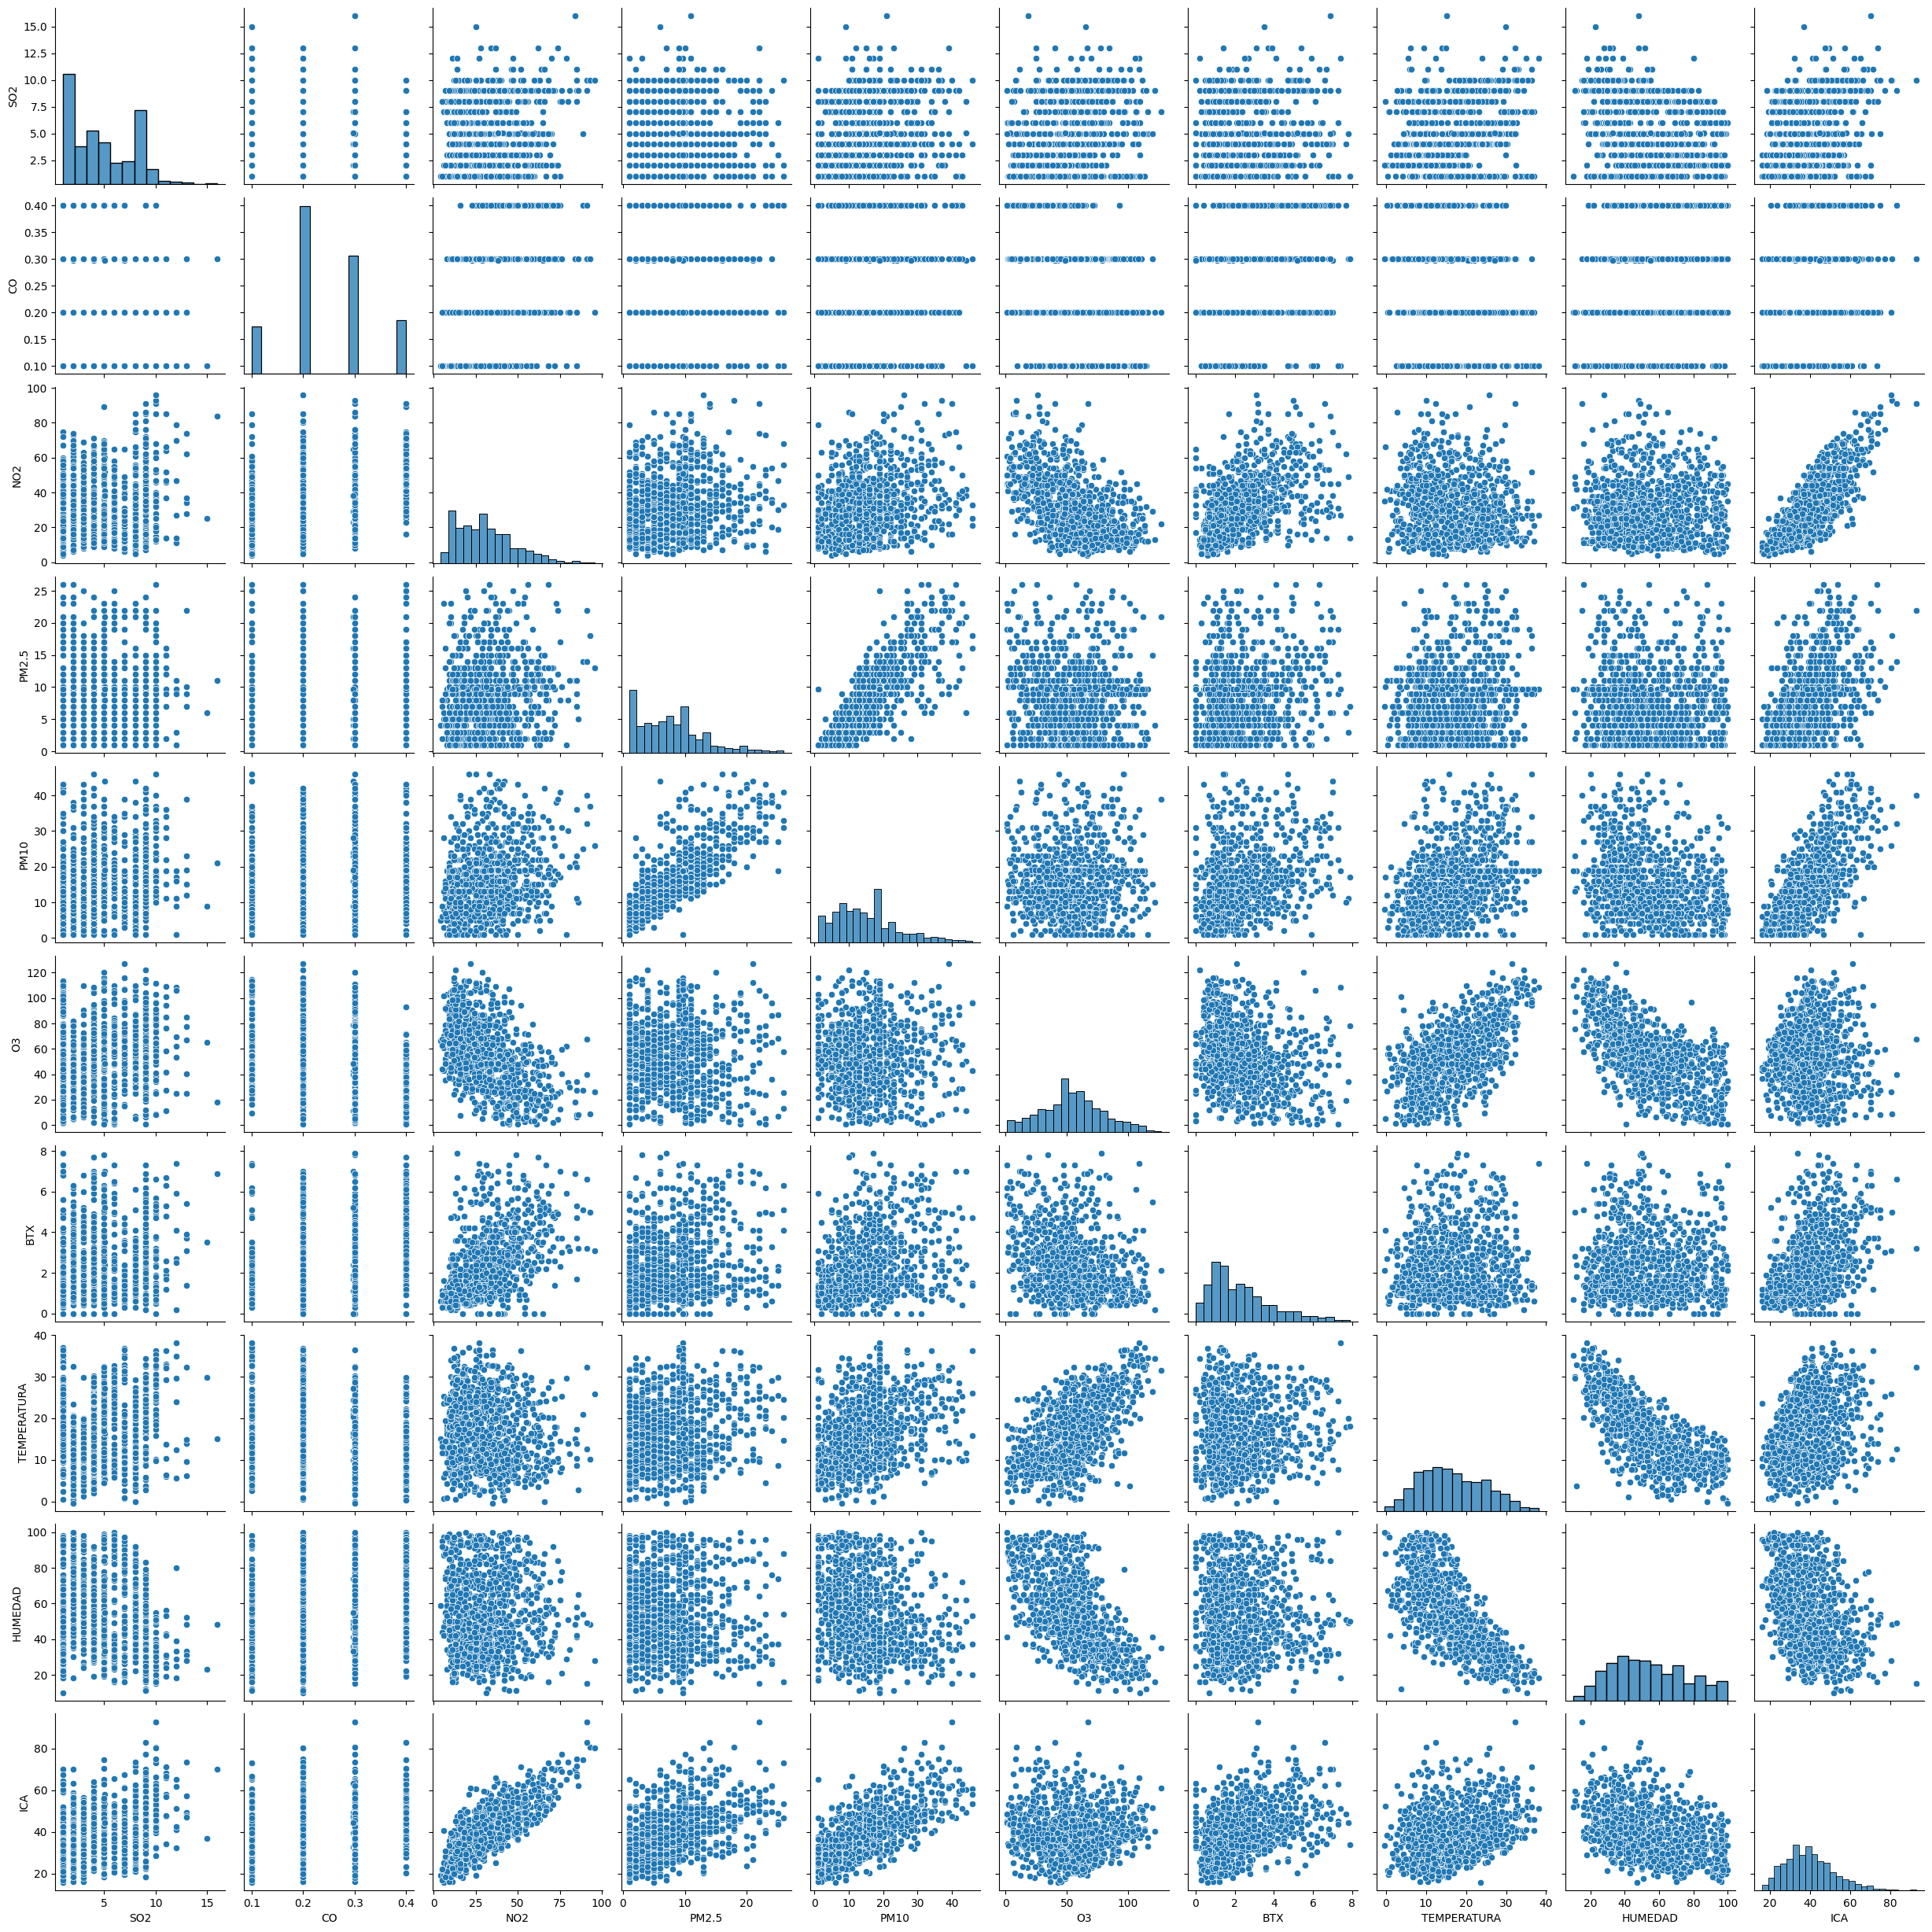

In [41]:

sns.pairplot(df_hist.sample(1000))

In [42]:
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA', 'ESTACION_AÑO',
       'TIPO_DIA', 'TIPO_HORA'],
      dtype='object')

In [43]:
df_hist.columns

Index(['DIA_SEMANA', 'SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX',
       'TEMPERATURA', 'HUMEDAD', 'ICA', 'ESCALA_ICA', 'ESCALA_PM2.5',
       'ESCALA_PM10', 'ESCALA_NO2', 'ESCALA_O3', 'ESCALA_SO2', 'TRAMO_HORA',
       'ALERTA'],
      dtype='object')

In [44]:
df_hist.drop(['TRAMO_HORA', 'RIESGO'],axis=1, inplace=True)

KeyError: "['RIESGO'] not found in axis"

In [ ]:
plt.figure(figsize=(15, 5), dpi=200)

df_corr = df_hist.corr(numeric_only=True).round(2)
filter = np.triu(df_corr)# np.triu para el triángulo superior
sns.heatmap(df_corr, annot=True, cmap="viridis",mask=filter)

In [ ]:
sns.clustermap(df_corr.round(1), cmap="viridis", standard_scale=1, annot=True)

In [ ]:
# Correlación con barras
df_corr =df.corr() # matriz de correlación

corr_ICA = df_corr['ICA'] # filtrar correlación precio
filter = (corr_ICA<-0.1) | (corr_ICA>0.1) # filtrar aquellas con baja correlación
corr_price = corr_ICA[filter]
corr_price = corr_price.sort_values(ascending=False)[1:] # ordenar descendente

plt.figure(figsize=(12,5))
ax =sns.barplot(x=corr_ICA.index, y=corr_ICA.values)
plt.xticks(rotation=45)

labels = [f'{value:.2f}' for value in corr_ICA.values] # redondear las correlaciones a dos decimales
#labels =[str(round(value,2)) for value in corr_price.values]
ax.bar_label(ax.containers[0], labels= labels);